## **MODUL 6 – Histogram, Histogram Equalization, Dithering**

Nama : Alfan Olivan

NIM : 2141720078

### **Tugas Praktikum**

#### 1. Import library

In [67]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

#### 2. Lena histogram

In [68]:
img = cv.imread("/content/drive/MyDrive/PCVK/Histogram/lena.jpg", cv.IMREAD_COLOR)

- Menggunakan matplotlib.pyplot

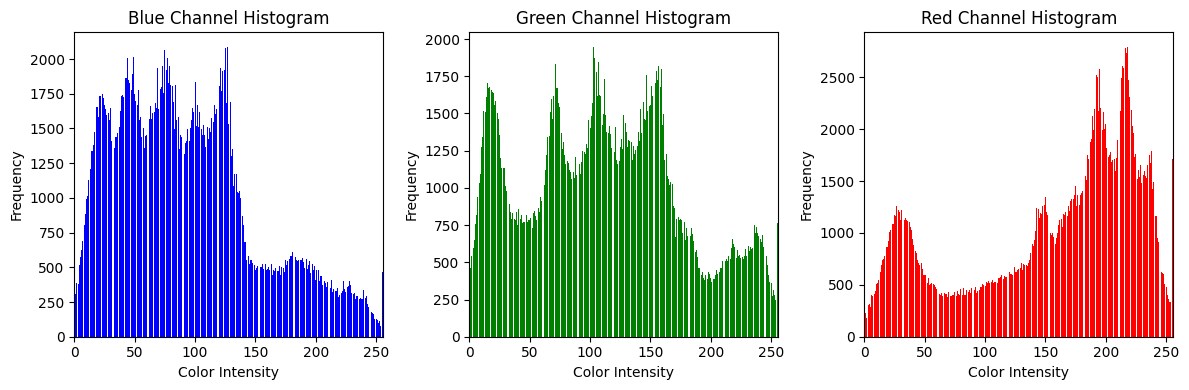

In [69]:
# Split the image into its RGB channels
b, g, r = cv.split(img)

# Calculate the histograms for each channel
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

# Flatten the histograms to 1D arrays
hist_b = hist_b.flatten()
hist_g = hist_g.flatten()
hist_r = hist_r.flatten()

# Create an array of pixel intensities from 0 to 255
intensities = list(range(256))

# Plot the histograms for each channel
plt.figure(figsize=(12, 4))  # Adjust the figure size for better visibility
plt.subplot(131)
plt.bar(intensities, hist_b, width=0.8, color='b')
plt.title("Blue Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(intensities, hist_g, width=0.8, color='g')
plt.title("Green Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(intensities, hist_r, width=0.8, color='r')
plt.title("Red Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

- Menggunakan Numpy histogram

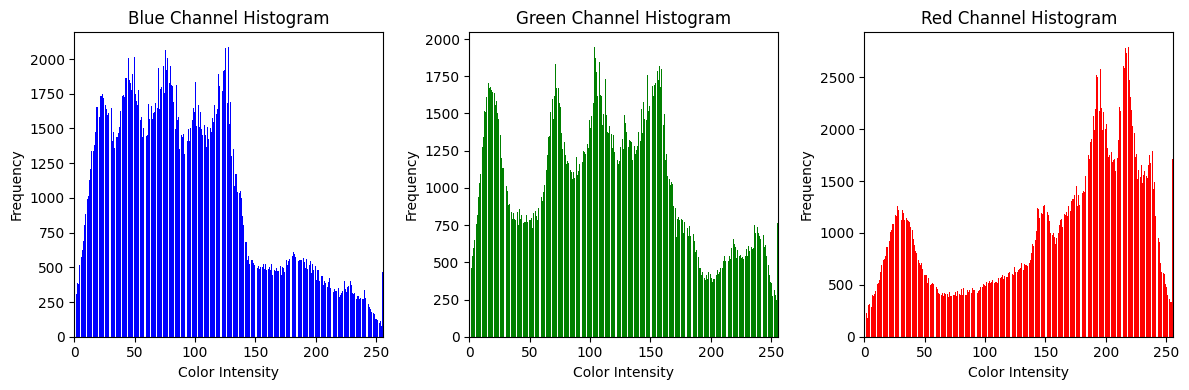

In [70]:
# Split the image into its RGB channels
b, g, r = cv.split(img)

# Compute the histograms for each channel using NumPy
hist_b, bin_edges_b = np.histogram(b, bins=256, range=(0, 256))
hist_g, bin_edges_g = np.histogram(g, bins=256, range=(0, 256))
hist_r, bin_edges_r = np.histogram(r, bins=256, range=(0, 256))

# Create an array of bin centers
bin_centers = (bin_edges_b[:-1] + bin_edges_b[1:]) / 2

# Plot the histograms for each channel
plt.figure(figsize=(12, 4))  # Adjust the figure size for better visibility
plt.subplot(131)
plt.bar(bin_centers, hist_b, width=0.8, color='b')
plt.title("Blue Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(bin_centers, hist_g, width=0.8, color='g')
plt.title("Green Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(bin_centers, hist_r, width=0.8, color='r')
plt.title("Red Channel Histogram")
plt.xlabel("Color Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

#### 3. Histogram Equalization

- Tanpa CV2 equalizeHist

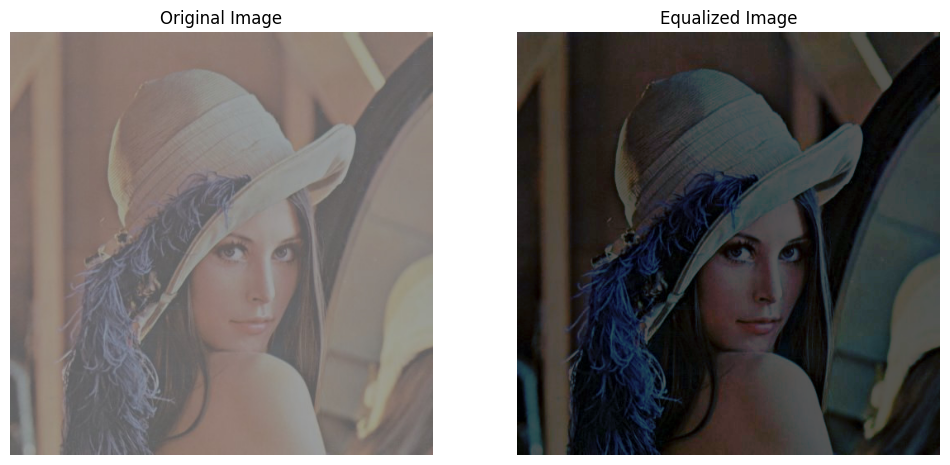

In [83]:
# Load the color image
img_2 = cv.imread("/content/drive/MyDrive/PCVK/Histogram/lena_lc.jpg", cv.IMREAD_COLOR)

# Separate the color channels
b, g, r = cv.split(img_2)

# Calculate the number of occurrences of each pixel color
hist_b = np.zeros(256, dtype=int)
hist_g = np.zeros(256, dtype=int)
hist_r = np.zeros(256, dtype=int)

# Count the occurrences of each color in the image
for i in range(img_2.shape[0]):
    for j in range(img_2.shape[1]):
        hist_b[b[i, j]] += 1
        hist_g[g[i, j]] += 1
        hist_r[r[i, j]] += 1

# Calculate the cumulative summation of frequencies
cdf_b = np.cumsum(hist_b)
cdf_g = np.cumsum(hist_g)
cdf_r = np.cumsum(hist_r)

# Normalize the cumulative frequencies
cdf_min = min(cdf_b.min(), cdf_g.min(), cdf_r.min())
cdf_b_normalized = ((cdf_b - cdf_min) / (img_2.size - cdf_min) * 255).astype(np.uint8)
cdf_g_normalized = ((cdf_g - cdf_min) / (img_2.size - cdf_min) * 255).astype(np.uint8)
cdf_r_normalized = ((cdf_r - cdf_min) / (img_2.size - cdf_min) * 255).astype(np.uint8)

# Apply histogram equalization to each color channel
equalized_b = cdf_b_normalized[b]
equalized_g = cdf_g_normalized[g]
equalized_r = cdf_r_normalized[r]

# Merge the equalized channels back into a color image
equalized_img = cv.merge((equalized_b, equalized_g, equalized_r))

# Display the original and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


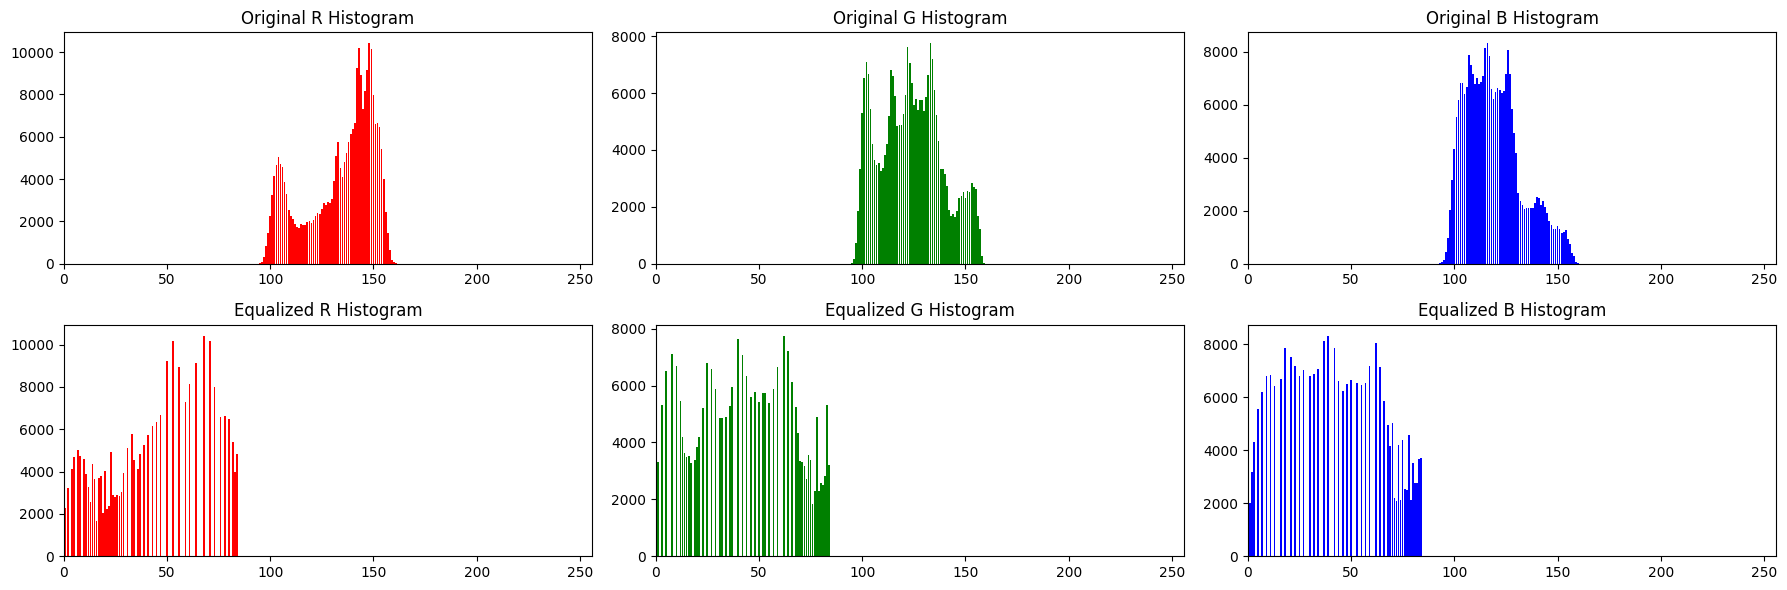

In [85]:
# Create histograms for the original and equalized images
hist_original_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_original_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_original_b = cv.calcHist([b], [0], None, [256], [0, 256])

hist_equalized_r = cv.calcHist([equalized_r], [0], None, [256], [0, 256])
hist_equalized_g = cv.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_b = cv.calcHist([equalized_b], [0], None, [256], [0, 256])

# Plot histograms for R, G, and B channels using bar plots
plt.figure(figsize=(18, 6))
plt.subplot(2, 3, 1)
plt.bar(range(256), hist_original_r[:,0], color='red')
plt.title("Original R Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 2)
plt.bar(range(256), hist_original_g[:,0], color='green')
plt.title("Original G Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 3)
plt.bar(range(256), hist_original_b[:,0], color='blue')
plt.title("Original B Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 4)
plt.bar(range(256), hist_equalized_r[:,0], color='red')
plt.title("Equalized R Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.bar(range(256), hist_equalized_g[:,0], color='green')
plt.title("Equalized G Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 6)
plt.bar(range(256), hist_equalized_b[:,0], color='blue')
plt.title("Equalized B Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

- Menggunakan CV2 equalizeHist

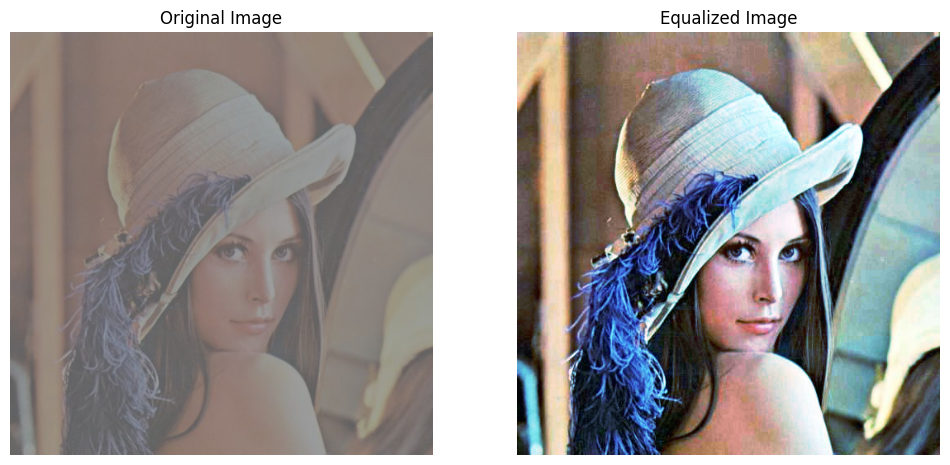

In [86]:
# Apply histogram equalization to each channel
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_img = cv.merge((equalized_b, equalized_g, equalized_r))

# Display the original and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

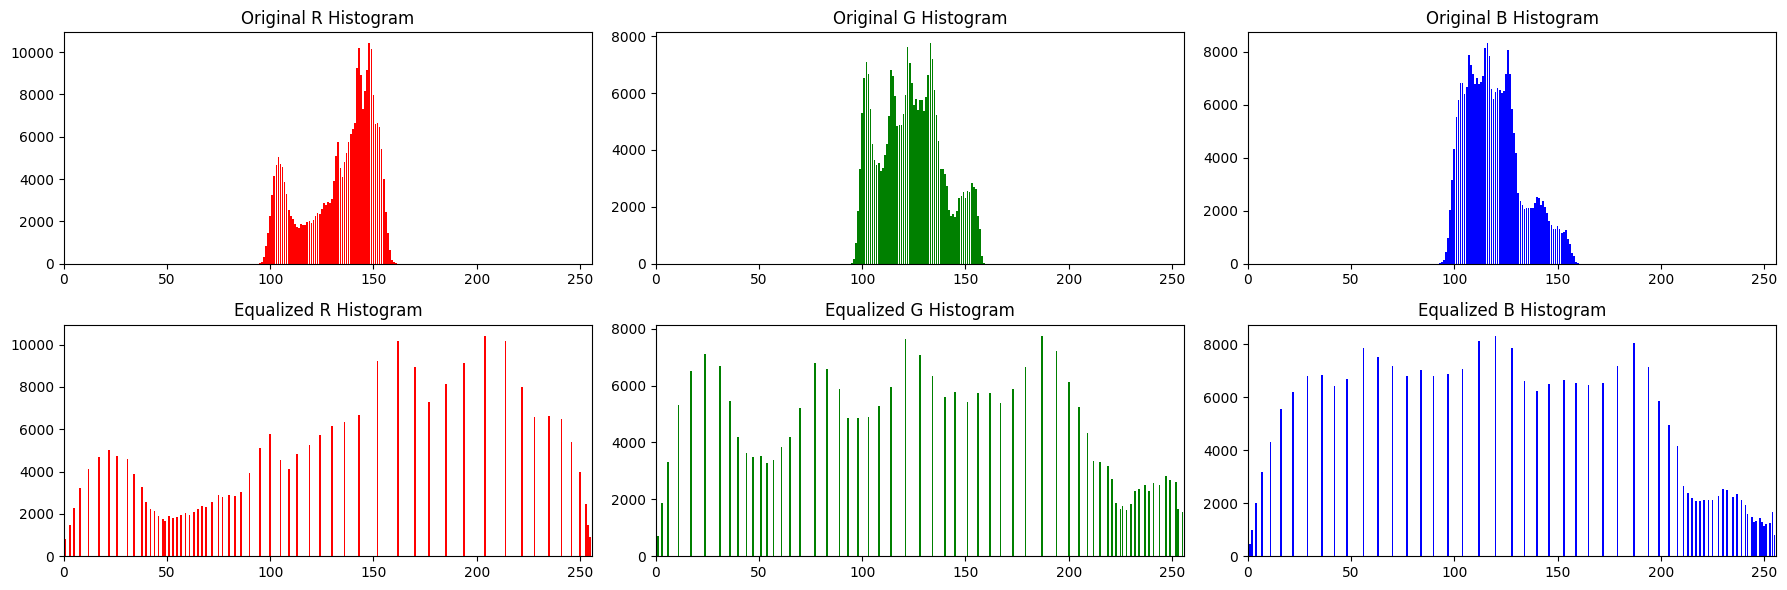

In [87]:
# Create histograms for the original and equalized images
hist_original_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_original_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_original_b = cv.calcHist([b], [0], None, [256], [0, 256])

hist_equalized_r = cv.calcHist([equalized_r], [0], None, [256], [0, 256])
hist_equalized_g = cv.calcHist([equalized_g], [0], None, [256], [0, 256])
hist_equalized_b = cv.calcHist([equalized_b], [0], None, [256], [0, 256])

# Plot histograms for R, G, and B channels using bar plots
plt.figure(figsize=(18, 6))
plt.subplot(2, 3, 1)
plt.bar(range(256), hist_original_r[:, 0], color='red')
plt.title("Original R Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 2)
plt.bar(range(256), hist_original_g[:, 0], color='green')
plt.title("Original G Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 3)
plt.bar(range(256), hist_original_b[:, 0], color='blue')
plt.title("Original B Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 4)
plt.bar(range(256), hist_equalized_r[:, 0], color='red')
plt.title("Equalized R Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.bar(range(256), hist_equalized_g[:, 0], color='green')
plt.title("Equalized G Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 6)
plt.bar(range(256), hist_equalized_b[:, 0], color='blue')
plt.title("Equalized B Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

#### 4. Proses pemetaan 16 juta warna RGB ke dalam 8 warna, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

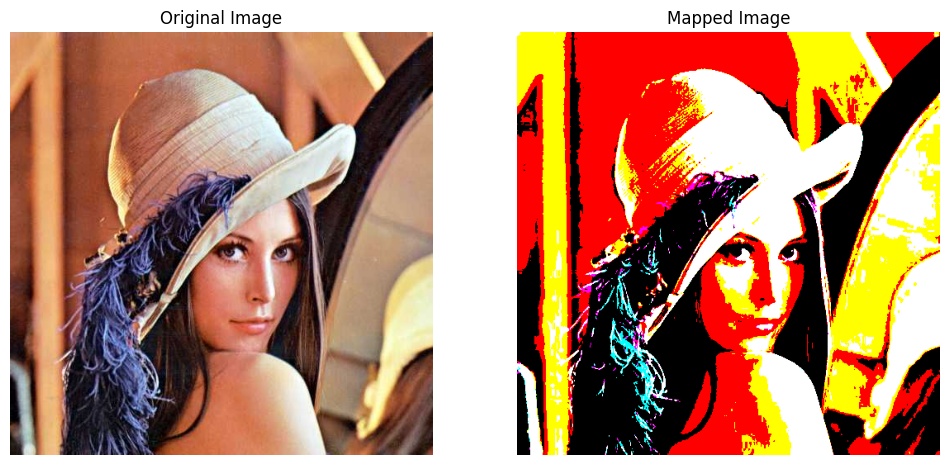

In [89]:
# Load the image
img = cv.imread("/content/drive/MyDrive/PCVK/Histogram/lena.jpg", cv.IMREAD_COLOR)

# Define the 8 target colors
colors = np.array([
    [0, 0, 0],        # Black
    [0, 255, 0],      # Green
    [255, 255, 0],    # Yellow
    [0, 0, 255],      # Blue
    [0, 255, 255],    # Cyan
    [255, 0, 255],    # Magenta
    [255, 255, 255]   # White
])

# Define a mapping function that finds the closest target color for each pixel
def map_to_closest_color(pixel):
    distances = np.linalg.norm(colors - pixel, axis=1)
    closest_color_index = np.argmin(distances)
    return colors[closest_color_index]

# Map the colors in the image
height, width, _ = img.shape
mapped_img = np.zeros_like(img)
for y in range(height):
    for x in range(width):
        pixel = img[y, x]
        mapped_img[y, x] = map_to_closest_color(pixel)

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mapped_img_rgb = cv.cvtColor(mapped_img, cv.COLOR_BGR2RGB)

# Display the original and mapped images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Mapped Image")
plt.imshow(mapped_img_rgb)
plt.axis('off')

plt.show()

#### 5. Dithering Floyd and Steinberg Process

Masukkan Banyak warna (nc) 0-255: 2


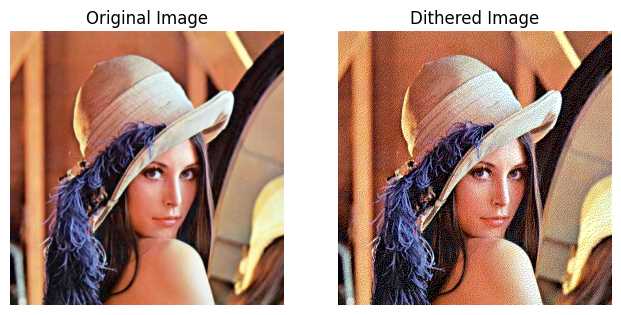

In [126]:
def fs_dither(img, nc):
    arr = np.array(img, dtype=float) / 255
    if len(arr.shape) == 2:
        # For grayscale images, add a third dimension (channels)
        arr = arr[:, :, np.newaxis]

    new_height, new_width, _ = arr.shape

    def get_new_val(old_val, nc):
        # Color quantization by rounding to the nearest color in nc.
        return np.round(old_val * (nc - 1)) / (nc - 1)

    for ir in range(new_height):
        for ic in range(new_width):
            old_val = arr[ir, ic].copy()
            new_val = get_new_val(old_val, nc)
            arr[ir, ic] = new_val
            err = old_val - new_val
            if ic < new_width - 1:
                arr[ir, ic + 1] += err * 7 / 16
            if ir < new_height - 1:
                if ic > 0:
                    arr[ir + 1, ic - 1] += err * 3 / 16
                arr[ir + 1, ic] += err * 5 / 16
                if ic < new_width - 1:
                    arr[ir + 1, ic + 1] += err / 16

    carr = np.array(arr / np.max(arr, axis=(0, 1)) * 255, dtype=np.uint8)
    return carr

# Set your parameters here
img_name = cv.imread("/content/drive/MyDrive/PCVK/Histogram/lena.jpg", cv.IMREAD_COLOR)

# Input the number of colors (nc) from the user
nc = int(input("Masukkan Banyak warna (nc) 0-255: "))

# Apply dithering and palette reduction
dimg = fs_dither(img_name, nc)

# Display the original and processed images using plt
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.title('Dithered Image')
plt.imshow(cv.cvtColor(dimg, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


#### 6. Gray image with histogram equalization & dithering Floyd and Steinberg

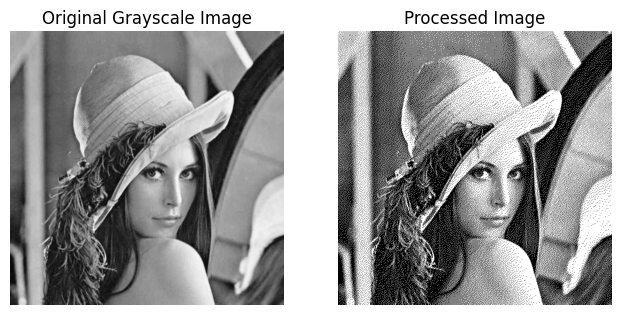

In [129]:
# Load the original image
img_color = cv.imread("/content/drive/MyDrive/PCVK/Histogram/lena_lc.jpg", cv.IMREAD_COLOR)

# Convert to grayscale
img_grayscale = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# Perform histogram equalization & dithering Floyd and Steinberg
img_equalized = cv.equalizeHist(img_grayscale)
dithered_image = fs_dither(img_equalized,2)

# Display the original, equalized, and dithered images using plt
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Original Grayscale Image')
plt.imshow(img_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Processed Image')
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.show()

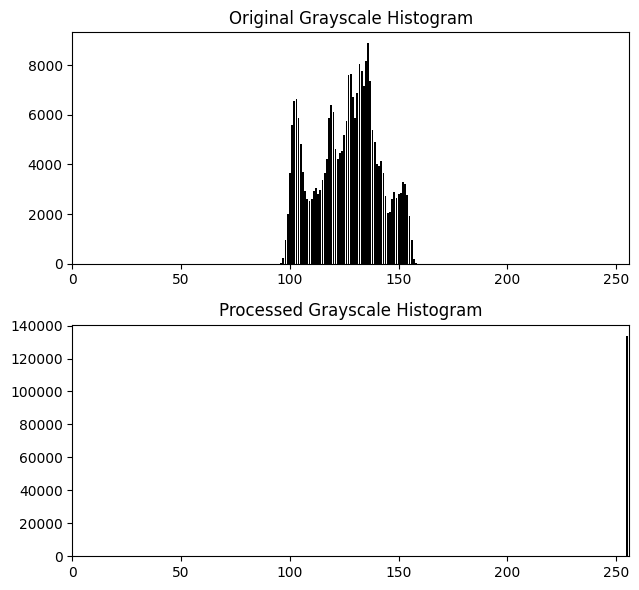

In [132]:
# Calculate the histograms
hist_original = cv.calcHist([img_grayscale], [0], None, [256], [0, 256])
hist_processed = cv.calcHist([dithered_image], [0], None, [256], [0, 256])

# Plot histograms for grayscale images using bar plots
plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.bar(range(256), hist_original[:, 0], color='black')
plt.title("Original Grayscale Histogram")
plt.xlim([0, 256])

plt.subplot(2, 3, 4)
plt.bar(range(256), hist_processed[:, 0], color='black')
plt.title("Processed Grayscale Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()